In [1]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
x,y = make_regression(n_samples=4,n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

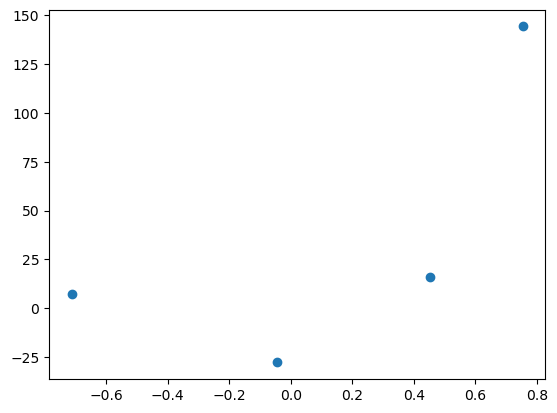

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [4]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(x,y)

LinearRegression()

In [7]:
reg.coef_

array([78.35063668])

In [8]:
reg.intercept_

26.15963284313262

In [9]:
x

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [10]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

In [11]:
reg.predict(x)

array([-29.65662909,  61.55941724,  22.67278832,  85.21770852])

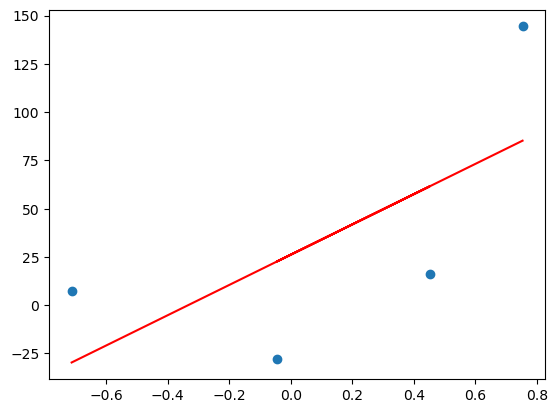

In [12]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color = "r")

In [13]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * x) + 0).reshape(4)

In [14]:
y_pred

array([-55.81580837,  35.39949674,  -3.48681619,  59.05759577])

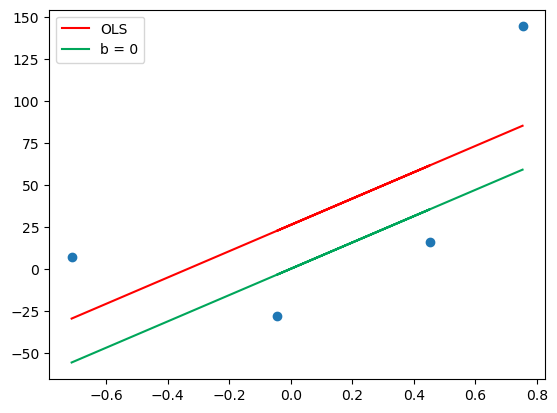

In [15]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c = "r",label = "OLS")
plt.plot(x,y_pred,c = "#00a65a",label = "b = 0")
plt.legend()
plt.show()

In [16]:
m = 78.35
b = 0
# y_ = m * x + b
# loss_Function = np.sum(y-y_)^2
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
loss_slope

-209.27763408209216

In [17]:
# Lets take lerning rate = 0.1
lr = 0.1
# b_new = b_old -(lr * loss_slope)
step_size = loss_slope*lr
step_size

-20.927763408209216

In [18]:
b = b - (lr * loss_slope)
b

20.927763408209216

In [19]:
y_pred1 = ((m*x)+b)

In [20]:
y_pred1

array([[-34.88804496],
       [ 56.32726015],
       [ 17.44094722],
       [ 79.98535918]])

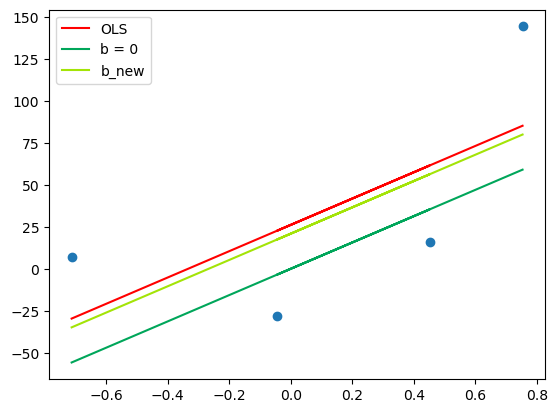

In [21]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c = "r",label = "OLS")
plt.plot(x,y_pred,c = "#00a65a",label = "b = 0")
plt.plot(x,y_pred1,c = "#A3E407",label = "b_new")
plt.legend()
plt.show()

In [22]:
loss_slope = -2 * np.sum(y - m*x.ravel() - b)
b = b - (lr * loss_slope)
b

25.11331608985106

In [23]:
y_pred2 = m*x+b

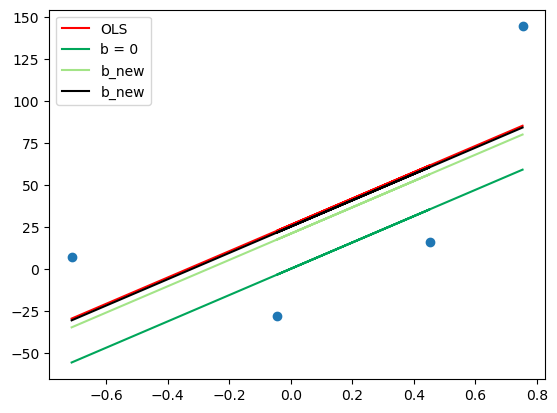

In [24]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c = "r",label = "OLS")
plt.plot(x,y_pred,c = "#00a65a",label = "b = 0")
plt.plot(x,y_pred1,c = "#A3E487",label = "b_new")
plt.plot(x,y_pred2,c = "k",label = "b_new")
plt.legend()
plt.show()

In [25]:
loss_slope = -2 * np.sum(y-m*x.ravel()-b)
loss_slope

-8.371105363283675

In [26]:
b = b - (lr * loss_slope)
b

25.95042662617943

In [27]:
y_pred3 = m*x+b

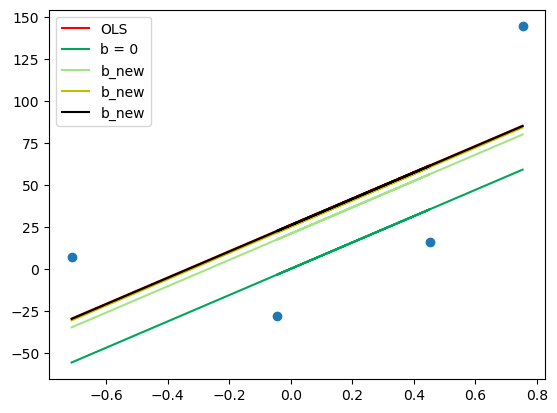

In [28]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c = "r",label = "OLS")
plt.plot(x,y_pred,c = "#00a65a",label = "b = 0")
plt.plot(x,y_pred1,c = "#A3E487",label = "b_new")
plt.plot(x,y_pred2,c = "y",label = "b_new")
plt.plot(x,y_pred3,c = "k",label = "b_new")
plt.legend()
plt.show()

In [29]:
m = 78.35
b = 0
epoch = 50
lr = 0.1

for i in range(epoch):
    b -= (lr * -2 * np.sum(y-m*x.ravel()-b))
    y_pr = m * x + b

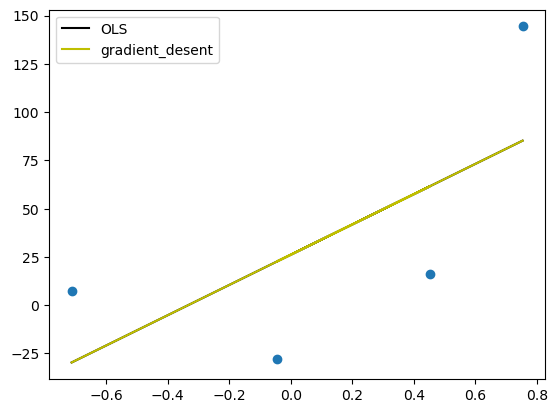

In [30]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),c = "k",label ="OLS")
plt.plot(x,y_pr,c = "y",label = "gradient_desent")
plt.legend()
plt.show()

"When m(slope) and b(intercept) is don't know"

we take m = 1 & b = 0

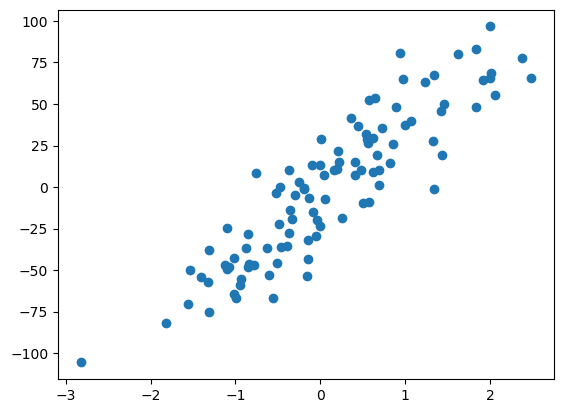

In [31]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)
plt.scatter(x,y)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [33]:
lr = LinearRegression()


In [34]:
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[38.73366985]
-6.0492084550116925


In [35]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6756624959621227

In [36]:
class GDRegressor():
    def __init__(self,learning_rate,epoch):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.m = 100
        self.b = 0
    def fit(self,x,y):
        for i in range(self.epoch):
            loss_slope_b = -2 * np.sum(y - self.m * x.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * x.ravel() - self.b) * x.ravel())
            
            self.b -= self.learning_rate * loss_slope_b
            self.m -= self.learning_rate * loss_slope_m
        print(self.b,self.m)
    def predict(self,x):
        return self.m * x + self.b
 

In [37]:
gd = GDRegressor(0.001,100,)
gd.fit(x,y)

-4.692654022630945 38.74488943401148


In [38]:
gd.fit(x_train,y_train)

-6.049208411423222 38.73366983952672


In [39]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6756624963662183

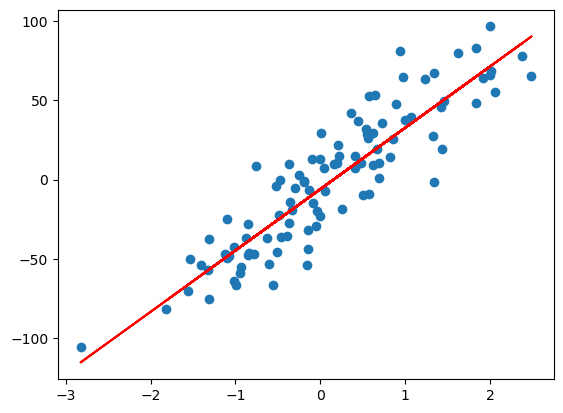

In [40]:
plt.scatter(x,y)
plt.plot(x,gd.predict(x),c = "r")
